## Data Preprocessing and cleaning

In [1]:

# %pip install seaborn 

import pandas as pd 

import numpy as np 

import seaborn as sns 

import matplotlib.pyplot as plt

# %pip install openpyxl
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("./2023-cleaned-survey.xlsx")

The above code is done to install the different packages that will be used for the jupyter notebook. 

Pandas is used to perform dataframe activities such as cleaning and analysis 
Seaborn and Matplotlib is used to perform different plotting activities 
I installed numpy to support/perform different operations
%pip install openpyxl and %pip install seaborn is used to install the different packages 


Once this is done the initial file is read in with the local variable as "df" 

In [2]:
df = df.fillna(np.nan)

print(df.shape)

(350, 271)


The above step is used to fill in the null values. Then, to find the shape. 

In [3]:
def columns_with_many_nans(df, threshold):
    """
    Returns a list of column names in the DataFrame that have more than the specified threshold of NaN values.
    """
    nan_count = df.isnull().sum()
    columns_with_excess_nans = nan_count[nan_count > threshold].index.tolist()
    return columns_with_excess_nans

threshold_start=349

columns_with_excess_nan_values = columns_with_many_nans(df, threshold_start)
columns_with_excess_nan_values

['Role Description as an Arts Educator',
 'Creative Disciplines You Teach',
 'Years of Experience as Arts Educator',
 'Rate Barriers to Success for Artists/Educators Access to affordable creative practice/development space',
 'Rate Barriers to Success for Artists/Educators Access to affordable performance/presentation space',
 'Rate Barriers to Success for Artists/Educators Access to funding',
 'Rate Barriers to Success for Artists/Educators Lack of business management knowledge',
 'Rate Barriers to Success for Artists/Educators No formal undergraduate, graduate, or informal technical skills training in your field',
 'Rate Barriers to Success for Artists/Educators Not enough of an audience for your work',
 'Rate Barriers to Success for Artists/Educators Perceived lack of support from the government (municipal, state)',
 'Rate Barriers to Success for Artists/Educators Perceived lack of support from the private sector/business community',
 'Rate Barriers to Success for Artists/Educators 

The above python cell contains a particular function that is used to find columns with more than 349 null values. This is used to drop the columns/questions in the survey that are never answered. This will help breakdown the dataset. This drops columns where all the values within the column is empty. 

In [4]:
df = df.drop(columns_with_excess_nan_values, axis=1)
df.shape  # Displaying the first few rows of the cleaned DataFrame

(350, 248)

The above cell is used to see how many columns are present now that we dropped the columns will all null values. 

In [5]:
df['Describe Your Primary Role in Creative Sector'] = df['Describe Your Primary Role in Creative Sector'].str.split("(").str[0].str.strip()

display(df["Describe Your Primary Role in Creative Sector"])


0                         Creative Worker
1                      Arts Administrator
2                             Arts Funder
3                   Business Professional
4      Civic and/or Social Service Worker
                      ...                
345                    Arts Administrator
346                       Creative Worker
347                 Business Professional
348      Arts Educator or Teaching Artist
349                 Business Professional
Name: Describe Your Primary Role in Creative Sector, Length: 350, dtype: object

The above cell is used to simplify the column closest to the occupation column. I did this because it will be easier to reference the different occupatiojn types. 

In [6]:
dataframes_dict = {}
unique_roles = df['Describe Your Primary Role in Creative Sector'].unique()

for role in unique_roles:
    dataframes_dict[role.strip()] = df[df['Describe Your Primary Role in Creative Sector'] == role]

# For demonstration, showing the first few rows of the dataframe for 'Creative Worker'
CreativeWorker = dataframes_dict['Creative Worker']
CreativeWorker = pd.DataFrame(CreativeWorker)
print('CreativeWorker:',CreativeWorker.shape)

ArtsAdministrator = dataframes_dict['Arts Administrator']
ArtsAdministrator = pd.DataFrame(ArtsAdministrator)
print('ArtsAdministrator:',ArtsAdministrator.shape)

ArtsFunder = dataframes_dict['Arts Funder']
ArtsFunder = pd.DataFrame(ArtsFunder)
print('ArtsFunder:',ArtsFunder.shape)

BusinessProfessional = dataframes_dict['Business Professional']
BusinessProfessional = pd.DataFrame(BusinessProfessional)
print('BusinessProfessional:',BusinessProfessional.shape)

CivicSocialServiceWorker = dataframes_dict['Civic and/or Social Service Worker']
CivicSocialServiceWorker = pd.DataFrame(CivicSocialServiceWorker)
print('CivicSocialServiceWorker:',CivicSocialServiceWorker.shape)

CreativeEntrepreneurs = dataframes_dict['Creative Entrepreneurs']
CreativeEntrepreneurs = pd.DataFrame(CreativeEntrepreneurs)
print('CreativeEntrepreneurs:',CreativeEntrepreneurs.shape)

ArtsEducator = dataframes_dict['Arts Educator or Teaching Artist']
ArtsEducator = pd.DataFrame(ArtsEducator)
print('ArtsEducator:',ArtsEducator.shape)


CreativeWorker: (50, 248)
ArtsAdministrator: (50, 248)
ArtsFunder: (50, 248)
BusinessProfessional: (50, 248)
CivicSocialServiceWorker: (50, 248)
CreativeEntrepreneurs: (50, 248)
ArtsEducator: (50, 248)


I used the above code block to split the new dataframe into a dictionary of dataframes. I split the cleaned dataframe based on the occupation. 

In [7]:
threshold = 49

#CreativeWorker cleaned empty columns
empty_columns_CreativeWorker = columns_with_many_nans(CreativeWorker, threshold)

CreativeWorker_cleaned_empty = CreativeWorker.drop(empty_columns_CreativeWorker, axis=1).reset_index()
print("Creative Worker Dimension:",CreativeWorker_cleaned_empty.shape)

#ArtsAdministrator cleaned empty columns
empty_columns_ArtsAdministrator = columns_with_many_nans(ArtsAdministrator, threshold)

ArtsAdministrator_cleaned_empty = ArtsAdministrator.drop(empty_columns_ArtsAdministrator, axis=1).reset_index()
print("Arts Administrator Dimension:",ArtsAdministrator_cleaned_empty.shape)

#ArtsFunder cleaned empty columns
empty_columns_ArtsFunder = columns_with_many_nans(ArtsFunder, threshold)

ArtsFunder_cleaned_empty = ArtsFunder.drop(empty_columns_ArtsFunder, axis=1).reset_index()
print("Arts Funder Dimension:",ArtsFunder_cleaned_empty.shape)


#BusinessProfessional cleaned empty columns
empty_columns_BusinessProfessional = columns_with_many_nans(BusinessProfessional, threshold)

BusinessProfessional_cleaned_empty = BusinessProfessional.drop(empty_columns_BusinessProfessional, axis=1).reset_index()
print("Business Professional Dimension:",BusinessProfessional_cleaned_empty.shape)

#CivicSocialServiceWorker cleaned empty columns
empty_columns_CivicSocialServiceWorker = columns_with_many_nans(CivicSocialServiceWorker, threshold)

CivicSocialServiceWorker_cleaned_empty = CivicSocialServiceWorker.drop(empty_columns_CivicSocialServiceWorker, axis=1).reset_index()
print("CivicSocial Service Worker Dimension:",CivicSocialServiceWorker_cleaned_empty.shape)

#CreativeEntrepreneurs cleaned empty columns
empty_columns_CreativeEntrepreneurs = columns_with_many_nans(CreativeEntrepreneurs, threshold)

CreativeEntrepreneurs_cleaned_empty = CreativeEntrepreneurs.drop(empty_columns_CreativeEntrepreneurs, axis=1).reset_index()
print("Creative Entrepreneurs Dimension:",CreativeEntrepreneurs_cleaned_empty.shape)


#CreativeEntrepreneurs cleaned empty columns
empty_columns_ArtsEducator = columns_with_many_nans(ArtsEducator, threshold)

ArtsEducator_cleaned_empty = ArtsEducator.drop(empty_columns_ArtsEducator, axis=1).reset_index()
print("Arts Educator Dimension:",ArtsEducator_cleaned_empty.shape)

# ArtsEducator_cleaned_empty.to_excel("ArtsEducator.xlsx")

# CreativeWorker_cleaned_empty.to_excel("CreativeWorker.xlsx")

# ArtsAdministrator_cleaned_empty.to_excel("ArtsAdministrator.xlsx")

# ArtsFunder_cleaned_empty.to_excel("ArtsFunder.xlsx")

# BusinessProfessional_cleaned_empty.to_excel("BusinessProfessional.xlsx")

# CivicSocialServiceWorker_cleaned_empty.to_excel("CivicSocialServiceWorker.xlsx")

# CreativeEntrepreneurs_cleaned_empty.to_excel("CreativeEntrepreneurs.xlsx")

Creative Worker Dimension: (50, 130)
Arts Administrator Dimension: (50, 130)
Arts Funder Dimension: (50, 33)
Business Professional Dimension: (50, 48)
CivicSocial Service Worker Dimension: (50, 29)
Creative Entrepreneurs Dimension: (50, 144)
Arts Educator Dimension: (50, 118)


As each of the occupations who did the survey have 50 respondents, I made sure to drop the columns with 50 null values in their columns.

## Question 1: For these two roles, what is the difference between how many arts events they visited in a single month on average pre- and post- COVID? Use figures to justify and demonstrte the reasoning for your answer.

In [8]:
df_business = BusinessProfessional

df_socialworker = CivicSocialServiceWorker

In the above code block, I am reading in the files that I created based on the occupation - Business Professionals and Social worker

In [9]:
"""
Converting the results in the columns regarding events to numeric answers. 
    """


def convert_to_numeric_adjusted(value):
    if pd.isna(value) or not isinstance(value, str):
        return None
    elif "-" in value:
        low, high = map(int, value.split("-"))
        return (low + high) / 2
    elif "or more" in value:
        return int(value.split()[0])
    else:
        return None
    
# For Business Professionals
df_business["Pre-COVID Arts Events"] = df_business["Prior to 2020, how many arts events would you attend, and/or arts venues would you visit, in an average month?"].apply(convert_to_numeric_adjusted)
df_business["Post-COVID Arts Events"] = df_business["Post pandemic restrictions (2022), how many arts events do you attend, and/or arts venues do you visit, in an average month?"].apply(convert_to_numeric_adjusted)

# For Civic Social Service Workers
df_socialworker["Pre-COVID Arts Events"] = df_socialworker["How many art events did you attend or venues did you visit per month before 2020?.1"].apply(convert_to_numeric_adjusted)
df_socialworker["Post-COVID Arts Events"] = df_socialworker["Post pandemic restrictions, how many arts events do you attend, and/or arts venues do you visit, in an average month?"].apply(convert_to_numeric_adjusted)

The column used for this question had strings for its responses. As a result I made a function which converts the strings into numeric answers. It takes the average of the lower and upper ranges. For the answer "5 and above" I made sure to

In [10]:
# Calculate the average attendance for each role pre- and post-COVID

# For Business Professionals
pre_covid_business_avg_new = df_business["Pre-COVID Arts Events"].mean()
post_covid_business_avg_new = df_business["Post-COVID Arts Events"].mean()

# For Civic Social Service Workers
pre_covid_civic_avg_new = df_socialworker["Pre-COVID Arts Events"].mean()
post_covid_civic_avg_new = df_socialworker["Post-COVID Arts Events"].mean()


In the above code block, I calculated the mean using the new function that I made 

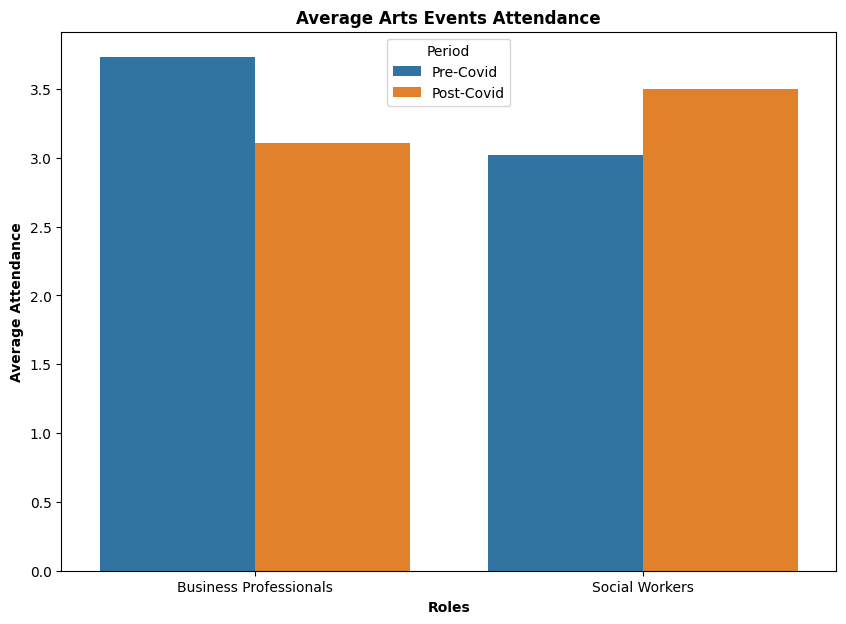

In [11]:
# Data for roles
roles = ['Business Professionals', 'Social Workers']

pre_covid_values = [pre_covid_business_avg_new, pre_covid_civic_avg_new]
post_covid_values = [post_covid_business_avg_new, post_covid_civic_avg_new]

# Create a dataframe with the data
df = pd.DataFrame({'Roles': roles, 'Pre-Covid': pre_covid_values, 'Post-Covid': post_covid_values})

# Melt the dataframe to plot it using seaborn
df_melted = pd.melt(df, id_vars=['Roles'], value_vars=['Pre-Covid', 'Post-Covid'], var_name='Period', value_name='Average Attendance')

# Plot the data using seaborn
plt.figure(figsize=(10,7))
sns.barplot(x='Roles', y='Average Attendance', hue='Period', data=df_melted)
plt.title('Average Arts Events Attendance', fontweight='bold')
plt.xlabel('Roles', fontweight='bold')
plt.ylabel('Average Attendance', fontweight='bold')
plt.show()


This is a grouped bar graph that shows the average attendance of Business professionals and social workers pre and post covid. The Y axis is used to showcase the average attendance while the X axis showcases the professions. Here it can be seen that pre covid, Business professionals attended the events more than the social workers. However, post covid the average number of social workers who attended the events is more than the business professionals. 

## Question 2

What arts disciplines are generally pursued/experienced by respondents in these roles and at what distribution?


In [12]:
# Define a dictionary to map each unique answer to its corresponding category
category_map = {
    'Performance arts': 'Performing Arts',
    'Textile art': 'Visual Arts',
    'Illustration': 'Visual Arts',
    'Ceramics': 'Visual Arts',
    'Painting': 'Visual Arts',
    'Art installations': 'Visual Arts',
    'Art festivals': 'Visual Arts',
    'Metalworking': 'Visual Arts',
    'Architectural design': 'Visual Arts',
    'Collage': 'Visual Arts',
    'Fashion design': 'Visual Arts',
    'Literature': 'Literary Arts',
    'Graphic design': 'Visual Arts',
    'Folk art': 'Visual Arts',
    'Drawing': 'Visual Arts',
    'Photography': 'Media Arts',
    'nan': 'Unknown',
    'Film and media': 'Media Arts',
    'Poetry': 'Literary Arts',
    'Woodworking': 'Visual Arts',
    'Graffiti': 'Visual Arts',
    'Comedy': 'Performing Arts',
    'Conceptual art': 'Visual Arts',
    'Museum exhibits': 'Visual Arts',
    'Digital art': 'Media Arts',
    'Mixed media': 'Visual Arts',
    'Engraving': 'Visual Arts',
    'Video art': 'Media Arts',
    'Jewelry design': 'Visual Arts',
    'Opera': 'Performing Arts',
    'Installation art': 'Visual Arts',
    'Dance': 'Performing Arts',
    'Land art': 'Visual Arts',
    'Interactive media': 'Media Arts',
    'Street art': 'Visual Arts',
    'Animation': 'Media Arts',
    'Storytelling': 'Literary Arts',
    'Visual arts': 'Visual Arts',
    'Glassblowing': 'Visual Arts',
    'Theater': 'Performing Arts',
    'Public art': 'Visual Arts',
    'Music': 'Performing Arts',
    'Printmaking': 'Visual Arts',
    'Culinary arts': 'Culinary Arts',
    'Bookbinding': 'Visual Arts',
    'Performance poetry': 'Performing Arts',
    'Sculpture': 'Visual Arts',
    'Crafts': 'Visual Arts'
}

# Replace the original cells with the corresponding category
df_business["Arts Disciplines Experienced in Last Year"] = df_business["Arts Disciplines Experienced in Last Year"].map(category_map)

The above cell categorizes the different unique responses into fewer categories for the purposes of analysis. The categorization dictionary is interpretated by AI and cross checked by the project team. 

In [13]:
# Define a dictionary to map each unique answer to its corresponding category
category_map = {
    'Digital Art': 'Media Arts',
    'Performance Art': 'Performing Arts',
    'Dance': 'Performing Arts',
    'Music': 'Performing Arts',
    'Ceramics': 'Visual Arts',
    'Theatre': 'Performing Arts',
    'nan': 'Unknown',
    'Sculpture': 'Visual Arts',
    'Visual Arts': 'Visual Arts',
    'Film': 'Media Arts',
    'Photography': 'Media Arts',
    'Music and Theatre': 'Performing Arts',
    'Film and Dance': 'Performing Arts',
    'Visual Arts and Photography': 'Multidisciplinary Arts'
}

# Replace the original cells with the corresponding category
df_socialworker["Which art disciplines have you experienced in the past year?.1"] = df_socialworker["Which art disciplines have you experienced in the past year?.1"].map(category_map)

The above cell categorizes the different unique responses into fewer categories for the purposes of analysis. The categorization dictionary is interpretated by AI and cross checked by the project team. 

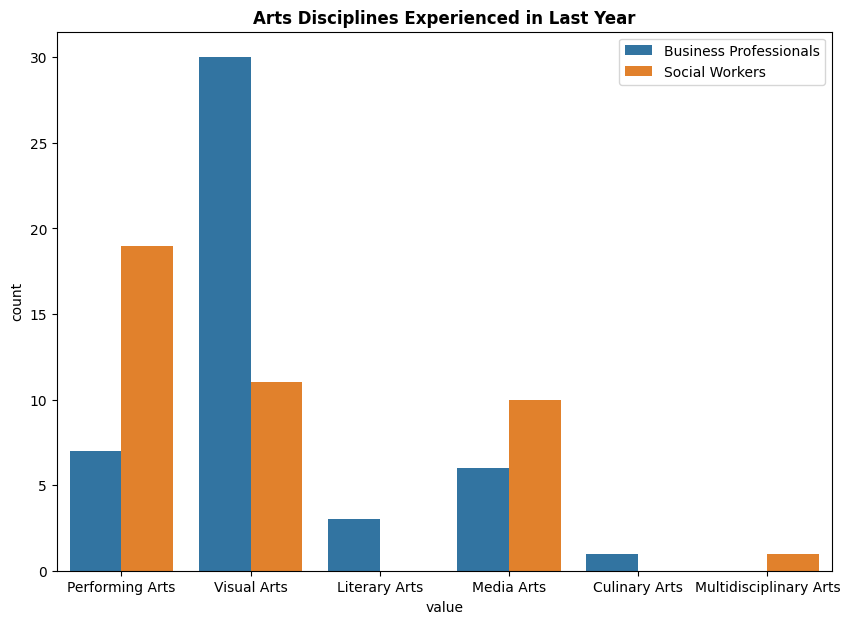

In [14]:
# Concatenate the two dataframes horizontally
combined_df = pd.concat([df_business["Arts Disciplines Experienced in Last Year"], df_socialworker["Which art disciplines have you experienced in the past year?.1"]], axis=1, keys=["Business Professionals", "Social Workers"])

# Melt the dataframe to create a long-form dataframe
melted_df = pd.melt(combined_df)

# Create a count plot with hue by each label
plt.figure(figsize=(10,7))
ax = sns.countplot(data=melted_df, x="value", hue="variable")
ax.legend(title='', loc='upper right')
plt.title("Arts Disciplines Experienced in Last Year", fontweight='bold')
plt.show()

The visualization compares the exposure to various art disciplines experienced by business professionals and social workers in the past year. Visual Arts appears to be significantly more popular among business professionals, while performing arts is more prevalent among social workers, followed by visual arts and media arts slightly behind. 

## Question 3: What areas of expertise are represented in these two roles?

In [15]:
# Identifying the columns related to areas of expertise or specializations in the datasets
potential_expertise_cols_business = [col for col in df_business.columns if "expert" in col.lower() or "speciali" in col.lower()]
potential_expertise_cols_socialworker = [col for col in df_business.columns if "expert" in col.lower() or "speciali" in col.lower()]

potential_expertise_cols_business, potential_expertise_cols_socialworker

(['Expertise Areas for VLPA Program',
  'If you have a physical space, please rate its features: Specialized work spaces (recording studio, dark room)',
  'Considering your current options for creative development and presentation in The Area, are your needs being met? Specialized work spaces (recording studio, dark room)'],
 ['Expertise Areas for VLPA Program',
  'If you have a physical space, please rate its features: Specialized work spaces (recording studio, dark room)',
  'Considering your current options for creative development and presentation in The Area, are your needs being met? Specialized work spaces (recording studio, dark room)'])

Finding the relevant questions/column to analysis. The only column we landed on is "Expertise Areas for VLPA Program"

In [16]:
# Extracting and analyzing the distribution of areas of expertise for Business Professionals
expertise_business = df_business["Expertise Areas for VLPA Program"].dropna().str.split(';').explode()
expertise_socialworker = df_socialworker["Expertise Areas for VLPA Program"].dropna().str.split(';').explode()

display(expertise_business.unique())
display(expertise_socialworker.unique())

array(['Financial management', 'Market research',
       'Leadership development', 'Intellectual property',
       'Social media management', 'Quality assurance', 'Design thinking',
       'Community engagement', 'Media relations', 'Event planning',
       'Brand development', 'Artistic development', 'Product development',
       'Risk management', 'Project management',
       'Creative problem solving', 'Technology integration',
       'Operational efficiency', 'Innovation management',
       'Organizational development', 'Strategic planning',
       'Sustainability', 'Human resources', 'Conflict resolution',
       'Supply chain management', 'Time management', 'Crisis management',
       'Diversity and inclusion', 'Networking and partnerships',
       'Economic forecasting', 'Contract negotiation', 'Digital presence',
       'Grant writing', 'Customer service', 'Legal compliance',
       'Data analysis', 'Marketing strategy', 'Fundraising',
       'Team building', 'Research and devel

array([], dtype=object)

Social worker do not have responses for this question. We will only apply analysis for business professionals

In [17]:
# Define a dictionary to map each unique response to its corresponding category
category_map = {
    'Financial management': 'Business Management',
    'Market research': 'Marketing',
    'Leadership development': 'Human Resources',
    'Intellectual property': 'Miscellaneous',
    'Social media management': 'Marketing',
    'Quality assurance': 'Business Management',
    'Design thinking': 'Miscellaneous',
    'Community engagement': 'Communication',
    'Media relations': 'Communication',
    'Event planning': 'Communication',
    'Brand development': 'Marketing',
    'Artistic development': 'Miscellaneous',
    'Product development': 'Business Management',
    'Risk management': 'Business Management',
    'Project management': 'Business Management',
    'Creative problem solving': 'Miscellaneous',
    'Technology integration': 'Miscellaneous',
    'Operational efficiency': 'Business Management',
    'Innovation management': 'Business Management',
    'Organizational development': 'Business Management',
    'Strategic planning': 'Business Management',
    'Sustainability': 'Miscellaneous',
    'Human resources': 'Human Resources',
    'Conflict resolution': 'Human Resources',
    'Supply chain management': 'Business Management',
    'Time management': 'Miscellaneous',
    'Crisis management': 'Business Management',
    'Diversity and inclusion': 'Human Resources',
    'Networking and partnerships': 'Communication',
    'Economic forecasting': 'Miscellaneous',
    'Contract negotiation': 'Business Management',
    'Digital presence': 'Marketing',
    'Grant writing': 'Miscellaneous',
    'Customer service': 'Miscellaneous',
    'Legal compliance': 'Miscellaneous',
    'Data analysis': 'Miscellaneous',
    'Marketing strategy': 'Marketing',
    'Fundraising': 'Miscellaneous',
    'Team building': 'Human Resources',
    'Research and development': 'Miscellaneous',
    'Public speaking': 'Communication',
    'Mentorship and coaching': 'Human Resources',
    'Public relations': 'Communication',
    'Cultural competency': 'Miscellaneous'
}

# Replace the original values with the corresponding category
df_business["Expertise Areas for VLPA Program"] = df_business["Expertise Areas for VLPA Program"].map(category_map)

The above cell categorizes the different unique responses into fewer categories for the purposes of analysis. The categorization dictionary is interpretated by AI and cross checked by the project team. 

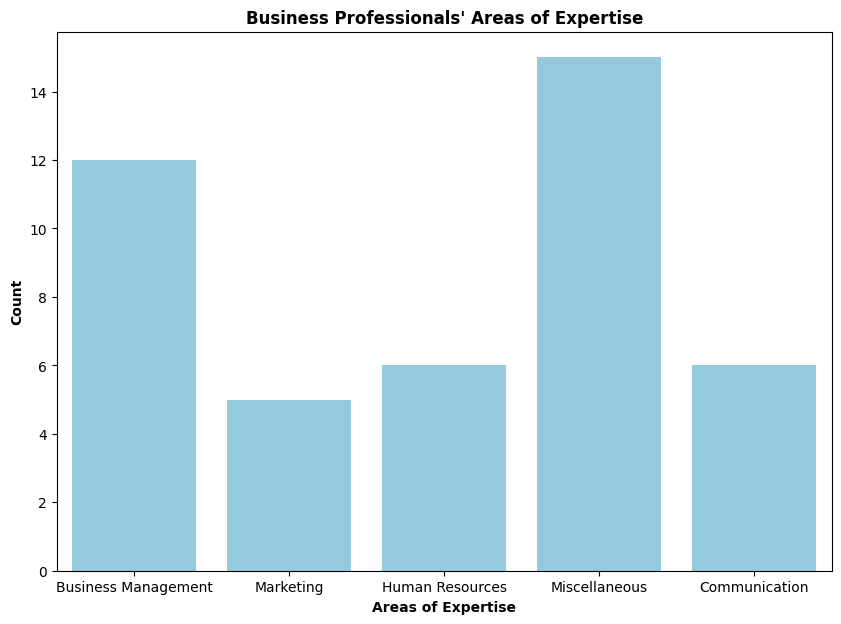

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_business, x="Expertise Areas for VLPA Program", color="skyblue")
plt.title("Business Professionals' Areas of Expertise", fontweight='bold')
plt.xlabel("Areas of Expertise", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()

The above graph only has one image showcasing the data regarding expertise for business professionals. There is no graph for the social workers as there is no column which showcases answer for this response.

The above graph showcases the expertise areas for business professionals. The X axis showcases the different expertise areas while the Y axis showcases the number of respondents. It can be seen that the most prominent expertise area is "Miscellaneous", which makes sense becasue this category incorporates a lot of different expertise areas that do not belong to any other categories. Besides that, Business Management is the most prominent single expertise area for business professionals. 

## Question 4

What are the distributions of sizes for companies/organizations for these two roles?

In [19]:
# Identifying the columns related to company or organization size in the datasets
potential_size_cols_business = [col for col in df_business.columns if "size" in col.lower() or "organization" in col.lower()]
potential_size_cols_socialworker = [col for col in df_business.columns if "size" in col.lower() or "organization" in col.lower()]

In [20]:
# Processing the corresponding columns
df_business["Current Company Size"].dropna(inplace=True)
df_socialworker["How large is your current organization?"].dropna(inplace=True)


In [21]:
df_business["Current Company Size"].unique()

array(['Medium: 50-249 employees', 'Large: 250+ employees',
       'Small: 10-49 employees', 'Micro: 1-9 employees'], dtype=object)

In [22]:
df_socialworker["How large is your current organization?"].unique()

array(['Medium: 50-249 employees', 'Micro: 1-9 employees',
       'Large: 250+ employees', 'Small: 10-49 employees'], dtype=object)

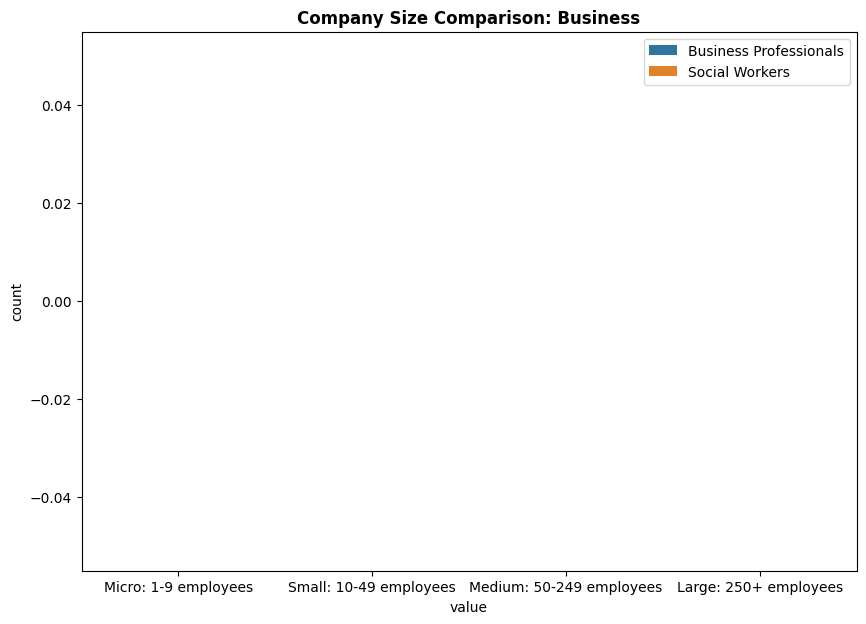

In [23]:
# Define the order of the bars
order = ["Micro: 1-9 employees", "Small: 10-49 employees", "Medium: 50-249 employees", "Large: 250+ employees"]

# Create a count plot with hue by each label
plt.figure(figsize=(10,7))
sns.countplot(data=melted_df, x="value", hue="variable", order=order)
plt.title("Company Size Comparison: Business", fontweight='bold')
plt.legend(title="", loc="upper right")
plt.show()


Comparison of Company/Organization Sizes between Business Professionals and Civic Social Service Workers.
Insights:
1. Micro Organizations Dominate for Civic Workers: The majority of Civic Social Service Workers are associated with "Micro" organizations having 1-9 employees.
2. Medium-Sized Businesses for Professionals: The highest number of Business Professionals are affiliated with "Medium" sized companies, having 50-249 employees.
3. Diverse Range for Civic Workers: While many Civic Social Service Workers are in micro organizations, there's a considerable representation across all other sizes as well, indicating diversity in the types of organizations they work with.
4. Diverse Range for Business Professionals: While many Business Professionals Workers are in medium organizations, there's a considerable representation across all other sizes as well.
In summary, while Civic Social Service Workers predominantly operate in smaller settings, Business Professionals have a broader spread across company sizes, with a notable inclination towards medium-sized businesses.

## Question 5 

To what extent are individuals of these roles interested in volunteering their skills for the VLPA program?

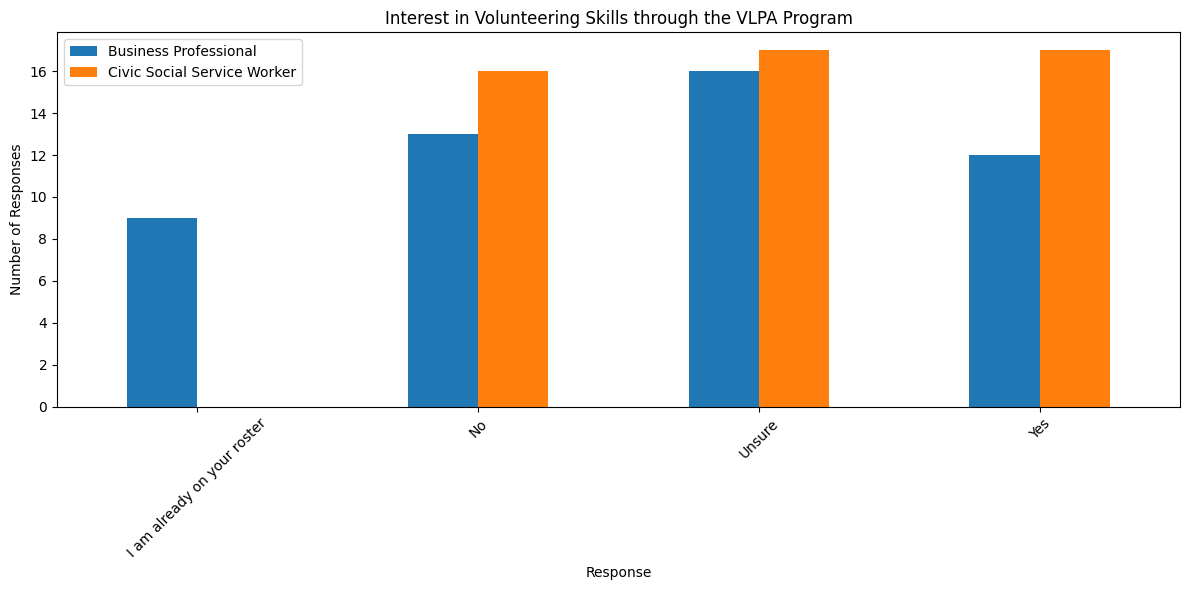

In [24]:
# Get counts for each unique response in the specified columns
bp_counts = BusinessProfessional_cleaned_empty["Would you be interested in volunteering your skills through our VLPA program?"].value_counts()
cssw_counts = CivicSocialServiceWorker_cleaned_empty["Would you be interested in volunteering your skills through our VLPA program?.1"].value_counts()
# Create a DataFrame from these counts for plotting
df_counts = pd.DataFrame({'Business Professional': bp_counts, 'Civic Social Service Worker': cssw_counts})
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
df_counts.plot(kind='bar', ax=ax)
plt.title("Interest in Volunteering Skills through the VLPA Program")
plt.ylabel("Number of Responses")
plt.xlabel("Response")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
print("Tabel 1")
# Display the dataframe containing the counts for both groups
df_counts.reset_index().rename(columns={"index": "Response"})

Tabel 1


,Response,Business Professional,Civic Social Service Worker
0,I am already on your roster,9,NaN
1,No,13,16.0
2,Unsure,16,17.0
3,Yes,12,17.0


In [26]:
print("Table 2")
# Combine the counts for "I am already on your roster" with "Yes" for Business Professional
df_counts.loc["Yes", "Business Professional"] += df_counts.loc["I am already on your roster", "Business Professional"]
# Drop the "I am already on your roster" row for Business Professional
df_counts = df_counts.drop("I am already on your roster")
# Display the updated table
df_counts.reset_index().rename(columns={"index": "Response"})

Table 2


,Response,Business Professional,Civic Social Service Worker
0,No,13,16.0
1,Unsure,16,17.0
2,Yes,21,17.0


Comments: 

Table 1 presents the responses exactly as they were provided. Table 2, we interpret the response "I am already on your roster" as a reaffirmation of the respondent's interest in volunteering their skills. Therefore, we have grouped this data under "yes" to indicate their willingness to volunteer through the VLPA program.

Insights: 

From the table, it's evident that a larger number of Social Workers are either unsure about or not interested in volunteering their skills for the VLPA program compared to Business Professionals. Conversely, more Business Professionals express a willingness to volunteer their skills for the VLPA program than Social Workers. However, for both Social Workers and Business Professionals, the majority of respondents are either unsure or not interested in contributing their skills to the VLPA program.

## Question 6 

What is the distribution of yearly financial or in-kind distributions to arts organizations for these two roles?

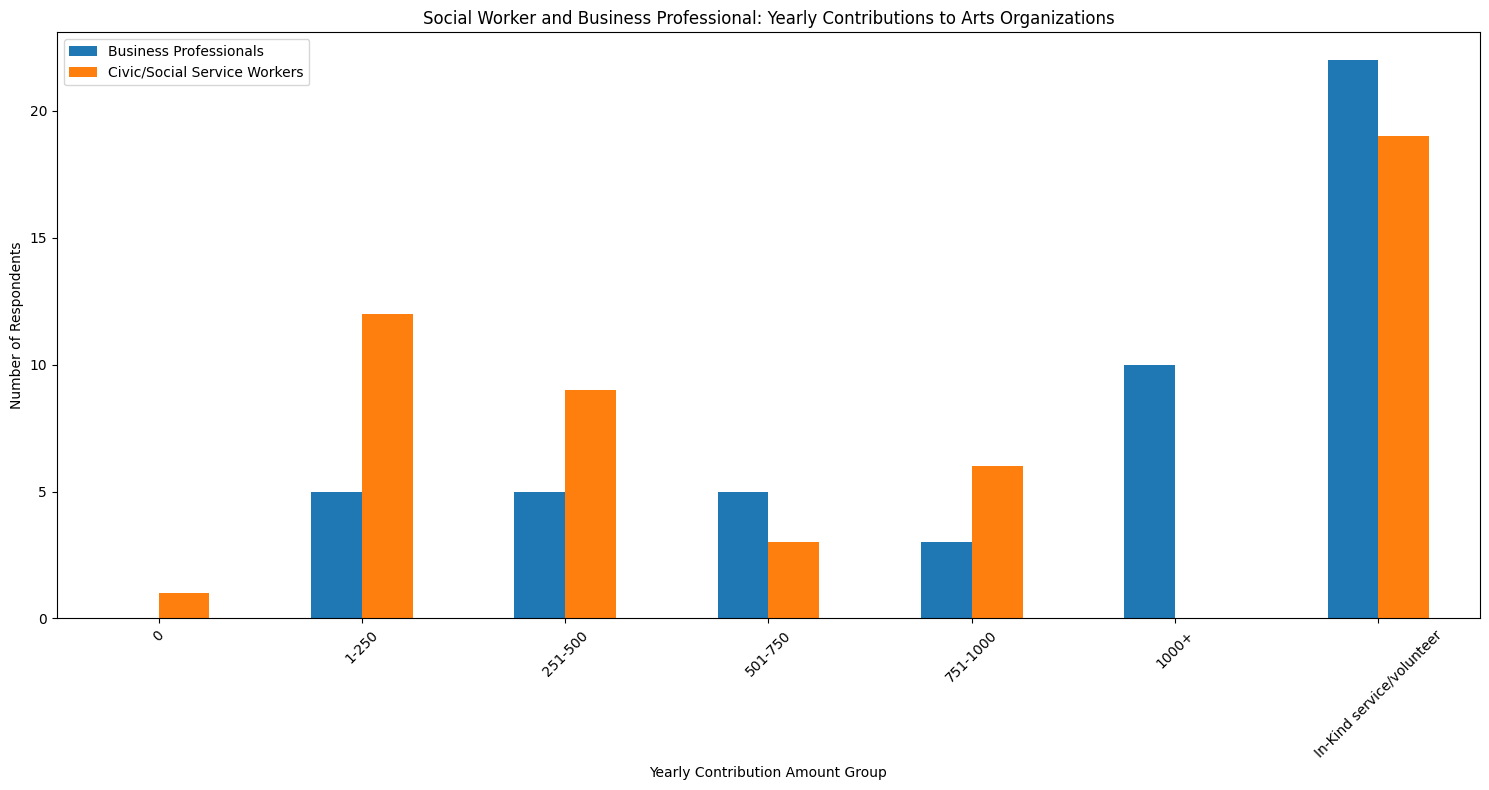

In [27]:
business_professional_df = df_business

civic_social_service_worker_df = df_socialworker

# Update the group_contributions function to treat "Other" as "In-Kind service/volunteer"
def group_contributions_updated(value):
    value_str = str(value)
    
    # Check for non-money contributions
    if "In-Kind service/volunteer" in value_str:
        return "In-Kind service/volunteer"
    
    # Extract the numeric part from the value
    try:
        amount = int(value_str.replace("$", "").replace(",", "").strip())
    except ValueError:
        return "In-Kind service/volunteer"  # Treat other as In-Kind service/volunteer
    
    # Define the groups
    if amount == 0:
        return "0"
    elif 1 <= amount <= 250:
        return "1-250"
    elif 251 <= amount <= 500:
        return "251-500"
    elif 501 <= amount <= 750:
        return "501-750"
    elif 751 <= amount <= 1000:
        return "751-1000"
    else:
        return f"1000+"

# Apply the updated grouping function to each dataset
business_professional_df["Grouped Contributions"] = business_professional_df["Yearly Contributions to Arts Organizations"].apply(group_contributions_updated)
civic_social_service_worker_df["Grouped Contributions"] = civic_social_service_worker_df["Please estimate your yearly contributions (financial or in-kind) to art organizations:.1"].apply(group_contributions_updated)

# Count the contributions for each group
business_grouped_contributions_updated = business_professional_df["Grouped Contributions"].value_counts()
civic_grouped_contributions_updated = civic_social_service_worker_df["Grouped Contributions"].value_counts()

# Combine the grouped data
combined_grouped_contributions_updated = pd.DataFrame({
    "Business Professionals": business_grouped_contributions_updated,
    "Civic/Social Service Workers": civic_grouped_contributions_updated
}).fillna(0)

# Sorting the index for a better visualization
ordered_index_updated = ["0", "1-250", "251-500", "501-750", "751-1000", "1000+", "In-Kind service/volunteer"]
combined_grouped_contributions_updated = combined_grouped_contributions_updated.reindex(ordered_index_updated)

# Plotting the updated grouped data
fig, ax = plt.subplots(figsize=(15, 8))
combined_grouped_contributions_updated.plot(kind='bar', ax=ax)
ax.set_title("Social Worker and Business Professional: Yearly Contributions to Arts Organizations")
ax.set_ylabel("Number of Respondents")
ax.set_xlabel("Yearly Contribution Amount Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The x-axis represents the grouped yearly contribution amounts (ranging from 0 to 1500+ and including "In-Kind service/volunteer").The y-axis represents the number of respondents for each contribution category.Blue bars represent "Business Professionals" and orange bars represent "Civic/Social Service Workers". The contributions have been grouped as per specifications, and the graph provides a clearer comparison between the two groups across the defined contribution ranges.

## Question 7 

What, if any, relationship is there between friends/family members working in the arts, participation in the arts (i.e., current average arts attendance), and yearly financial/in-kind contributions?

No correlations were found, as shown in the table below.


In [28]:

data = CivicSocialServiceWorker_cleaned_empty

# Extract the relevant columns
selected_columns = [
    "Do you have relatives or friends working in the arts?.1",
    "Post pandemic restrictions, how many arts events do you attend, and/or arts venues do you visit, in an average month?",
    "Please estimate your yearly contributions (financial or in-kind) to art organizations:.1"
]

subset_data = data[selected_columns]
subset_data.head()



# 1. Convert "Do you have relatives or friends working in the arts?.1" to binary
subset_data['Relatives_Friends_Arts'] = subset_data["Do you have relatives or friends working in the arts?.1"].map({'Yes': 1, 'No': 0})

# 2. Convert "Post pandemic restrictions..." to ordinal numbers
event_mapping = {
    'None': 0,
    '1-2': 1,
    '3-4': 2,
    '5 or more': 3
}
subset_data['Arts_Events_Attendance'] = subset_data["Post pandemic restrictions, how many arts events do you attend, and/or arts venues do you visit, in an average month?"].map(event_mapping)

# 3. Extract numerical values from "Please estimate your yearly contributions..."
def extract_contribution(value):
    try:
        return float(value.replace('$', '').replace(',', ''))
    except:
        return 0

subset_data['Yearly_Contributions'] = subset_data["Please estimate your yearly contributions (financial or in-kind) to art organizations:.1"].apply(extract_contribution)

# Calculate the correlation matrix
correlation_matrix = subset_data[['Relatives_Friends_Arts', 'Arts_Events_Attendance', 'Yearly_Contributions']].corr()
correlation_matrix


,Relatives_Friends_Arts,Arts_Events_Attendance,Yearly_Contributions
Relatives_Friends_Arts,1.000000,-0.028141,-0.042938
Arts_Events_Attendance,-0.028141,1.000000,0.297885
Yearly_Contributions,-0.042938,0.297885,1.000000
